<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports-and-Function-Definitions" data-toc-modified-id="Imports-and-Function-Definitions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports and Function Definitions</a></span></li><li><span><a href="#Define-Function-for-Estimating-Energy-Levels" data-toc-modified-id="Define-Function-for-Estimating-Energy-Levels-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Define Function for Estimating Energy Levels</a></span></li><li><span><a href="#Interactive-Plottting-Transcendental-Equations" data-toc-modified-id="Interactive-Plottting-Transcendental-Equations-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Interactive Plottting Transcendental Equations</a></span></li><li><span><a href="#Calculate-Wavefunctions" data-toc-modified-id="Calculate-Wavefunctions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Calculate Wavefunctions</a></span></li><li><span><a href="#Plot-Wavefunctions" data-toc-modified-id="Plot-Wavefunctions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Plot Wavefunctions</a></span></li></ul></div>

# Imports and Function Definitions

In [4]:
import numpy as np
from ipywidgets import interact
from scipy.signal import argrelmin
import scipy.linalg as scl

import matplotlib.pyplot as plt
plt.style.use("default")
import warnings 
warnings.simplefilter('ignore')

# Define Function for Estimating Energy Levels

In [5]:
# Left hand side
def f1(xi_0, xi):
    return np.sqrt(xi_0**2 - xi**2)/xi

# Even right-hand side 
def f2_even(xi):
    return  np.tan(xi)

# Odd right-hand side 
def f2_odd(xi):
    return - np.cos(xi)/np.sin(xi)

def plot_transcendental(V0, a):
    m=4
    hbar = 1 
    xi = np.linspace(0.005, 17.3, 100000)
    xi_0 = np.sqrt(2*m*V0)*a/(2*hbar)
    
    lw = 3
    
    ################### EVEN ####################
    
    # Plotting
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))
    tmp_yi = f2_even(xi)
    tmp_yi[tmp_yi > 30]= np.nan
    
    ax1.plot(xi, tmp_yi, color="tab:blue", lw=lw, 
             label=r"$\tan(\xi)$")
    ax1.plot(xi, f1(xi_0, xi), color="tab:red", lw=lw, 
             label=r"$\frac{\sqrt{\xi_0^2 - \xi^2}}{\xi}$")
    ax1.legend(fontsize=24,
               frameon=False, 
               handlelength=.75, 
               handletextpad=0.4,
               labelspacing=.15,
               columnspacing=1.,
               bbox_to_anchor = (-.015, 0.6))
    ax1.set_title("Even", fontsize=30)
    ax1.set_xlabel(r"$\xi$", fontsize=30)
    ax1.set_yticks([0])
    ax1.tick_params(axis="both", which="major", labelsize=20)

    # Finding zeros for even transcendental equations
    zeros = argrelmin(abs(f1(xi_0, xi) - f2_even(xi)), order=1)
    levels = xi[zeros]
    
    # Plotting the cross-section points
    ax1.scatter(levels, f2_even(levels), marker="X", s=250, color="black")
    
    # Plotting the lines where tan(x) diverge
    for level in [n*np.pi / 2 for n in range(11)]:
        ax1.axvline(level, 
                    linestyle='--', c="tab:grey", linewidth=0.85)

    # Set limits and plot title with number of bound states
    ax1.set_ylim(0, 20)
    ax1.set_title(f"Even [{len(levels)} bound states]", fontsize=30)

    
    ################### ODD #########################
    
    # Plotting
    tmp_yi = f2_odd(xi)
    tmp_yi[tmp_yi > 30]= np.nan 
    ax2.plot(xi, tmp_yi, color="tab:green", lw=lw, 
             label=r"$-\cot(\xi)$")
    ax2.plot(xi, f1(xi_0, xi), color="tab:red", lw=lw, 
             label=r"$\frac{\sqrt{\xi_0^2 - \xi^2}}{\xi}$")
    ax2.legend(fontsize=24,
               frameon=False, 
               handlelength=.75, 
               handletextpad=0.4,
               labelspacing=.15,
               columnspacing=1.,
               bbox_to_anchor = (1.015, 0.6))
    ax2.set_xlabel(r"$\xi$", fontsize=30)
    ax2.set_yticks([0])
    ax2.tick_params(axis="both", which="major", labelsize=20)

    # Finding zeros for odd transcendental equations
    zeros = argrelmin(abs(f1(xi_0, xi) - f2_odd(xi)), order=1)
    levels = xi[zeros]
    
    # Plotting the cross-section points
    ax2.scatter(levels, f2_odd(levels), marker="X", s=250, color="black")
    
    # Plotting the lines where cot(x) diverge
    for level in [n*np.pi / 2 for n in range(11)]:
        ax2.axvline(level, 
                    linestyle='--', c="tab:grey", linewidth=0.85)

    # Set limits and plot title with number of bound states
    ax2.set_ylim(0, 20)
    ax2.set_title(f"Odd [{len(levels)} bound states]", fontsize=30)

    fig.suptitle(r"$V_0={}, \;\;  a={}$".format(V0, a), 
                 color="tab:red", fontsize=40, y=1.025)

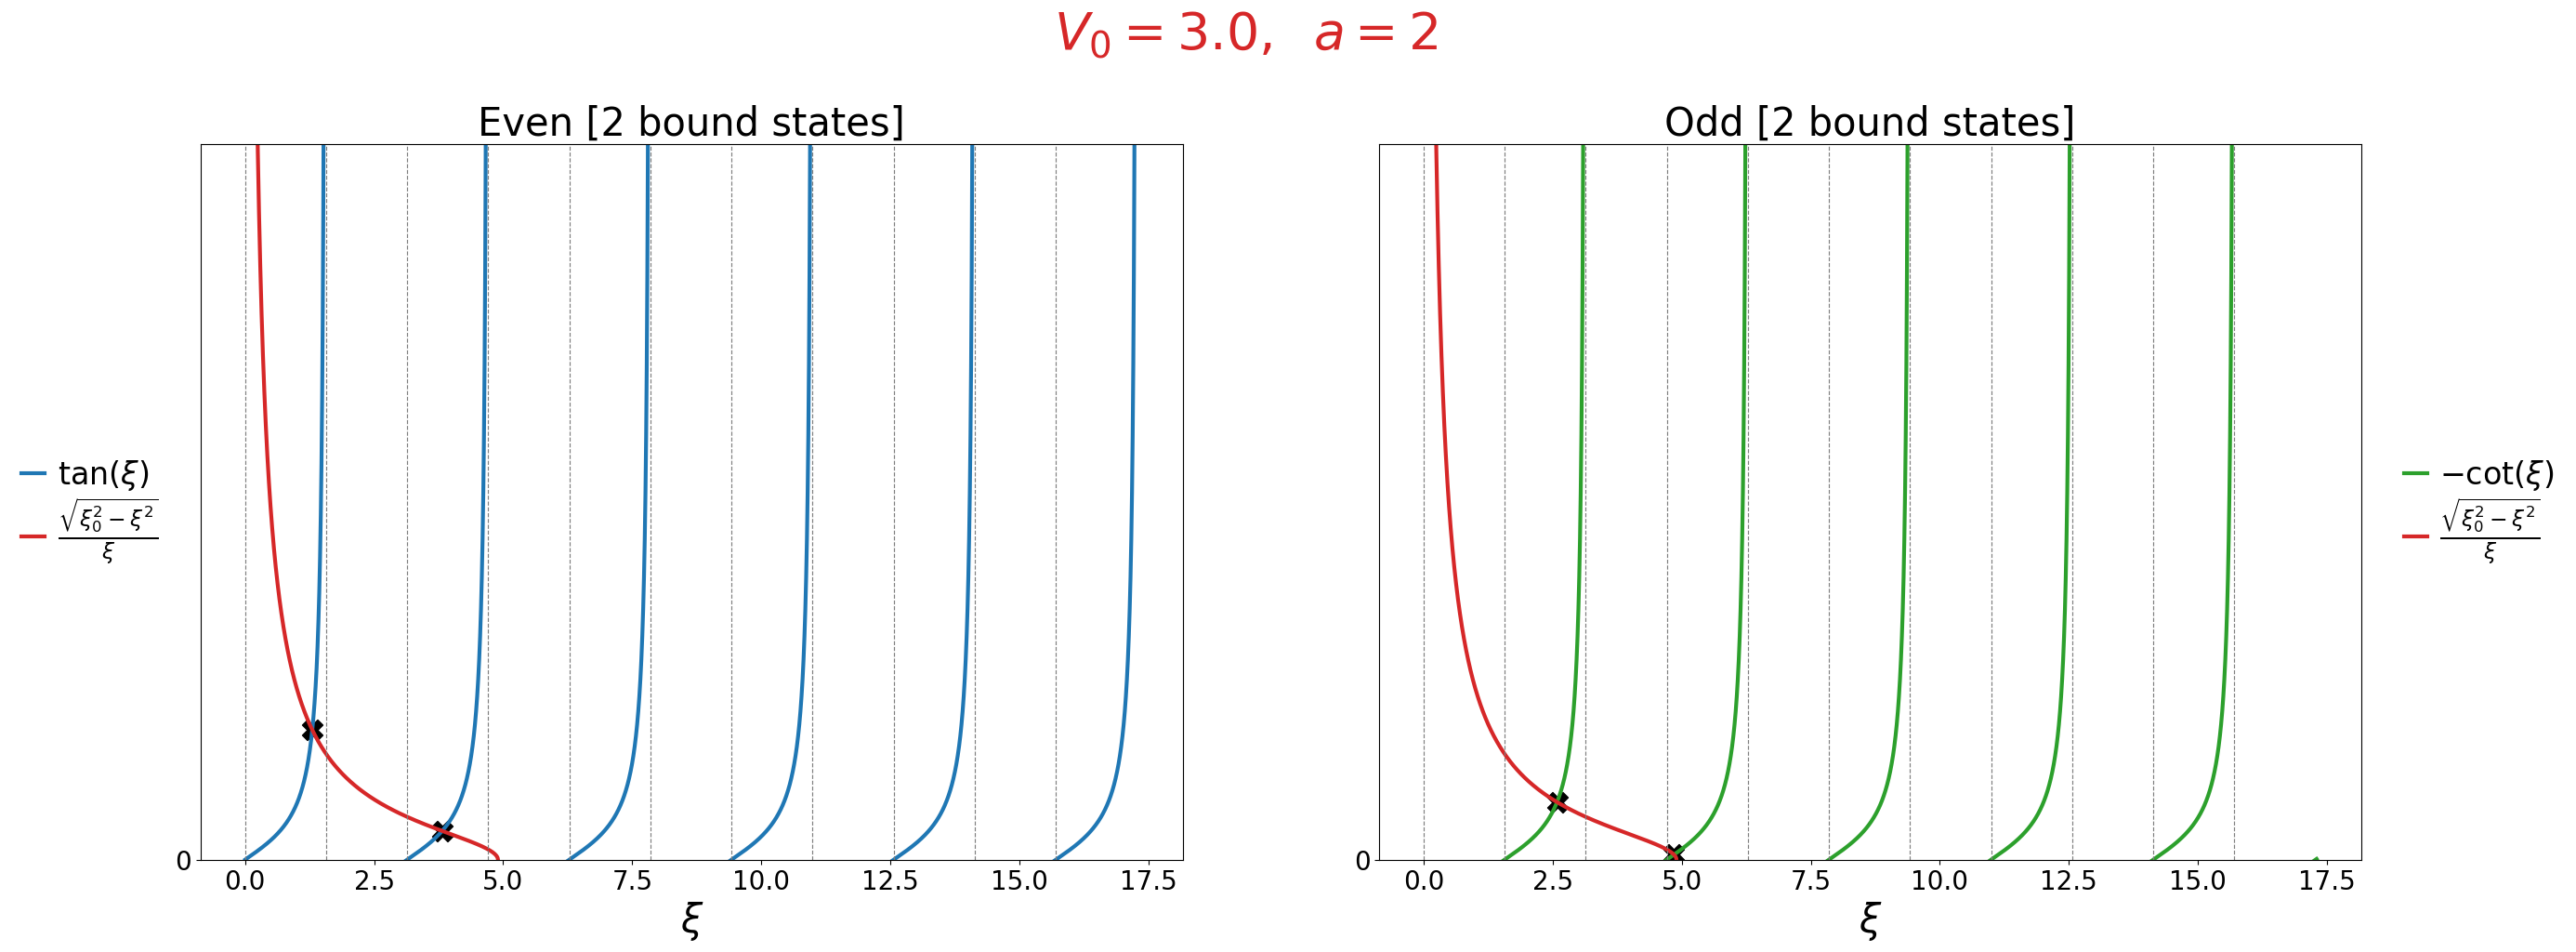

In [6]:
plot_transcendental(V0=3., a=2)

# Interactive Plottting Transcendental Equations

Need ipywidget module for this to work.

In [7]:
interact(plot_transcendental, V0=(0.1, 20, 0.5), a=(1, 7, 1))
plt.show()

interactive(children=(FloatSlider(value=9.6, description='V0', max=20.0, min=0.1, step=0.5), IntSlider(value=4…

# Calculate Wavefunctions

Find the eigenfunctions by setting up S.L. as a matrix-problem and solving the eigenvalue-equation.

Can take a couple of minutes to inverte the matrix

In [24]:
def plot_bound_states(a = 2., V0 = -4.):
    
    hbar = 1
    m = 2
    N = 6000
    calculation_area = 250.0
    x = np.linspace(-calculation_area/2., calculation_area/2., N)
    h = x[1]-x[0] 
    V=np.zeros(N)
    for i in range(N):
        if x[i] > -a/2. and x[i] < a/2.:
            V[i] = V0

    d2dx2 = 1./(h*h)*(np.diag(np.ones(N-1),-1) - 2* np.diag(np.ones(N),0) + np.diag(np.ones(N-1),1))
    H = -(hbar*hbar)/(2.0*m)*d2dx2 + np.diag(V) 
    E, psiT = np.linalg.eigh(H) 
    psi = np.transpose(psiT)

    plt.figure(figsize=(15,12))
    plt.xlim((-1.4*a, 1.4*a))
    plt.plot(x,V/(-V0), "--", lw=3, alpha=0.6, color="Gray",label="V(x) scaled to 1")
    for i in range(8):
        if E[i]<0:                 
            plt.plot(x,psi[i]/np.sqrt(h), lw=3, 
                     label="$\psi_{} \;\; [E_{}$={:>8.3f}]".format(i,i,E[i]))

    plt.title(r"Bound States in Finite Square Well for $V_0=${} and $a=${}".format(V0, a), 
              fontsize=26)
    plt.legend(fontsize=20)
    plt.xlabel("x", fontsize=26)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.show()

# Plot Wavefunctions

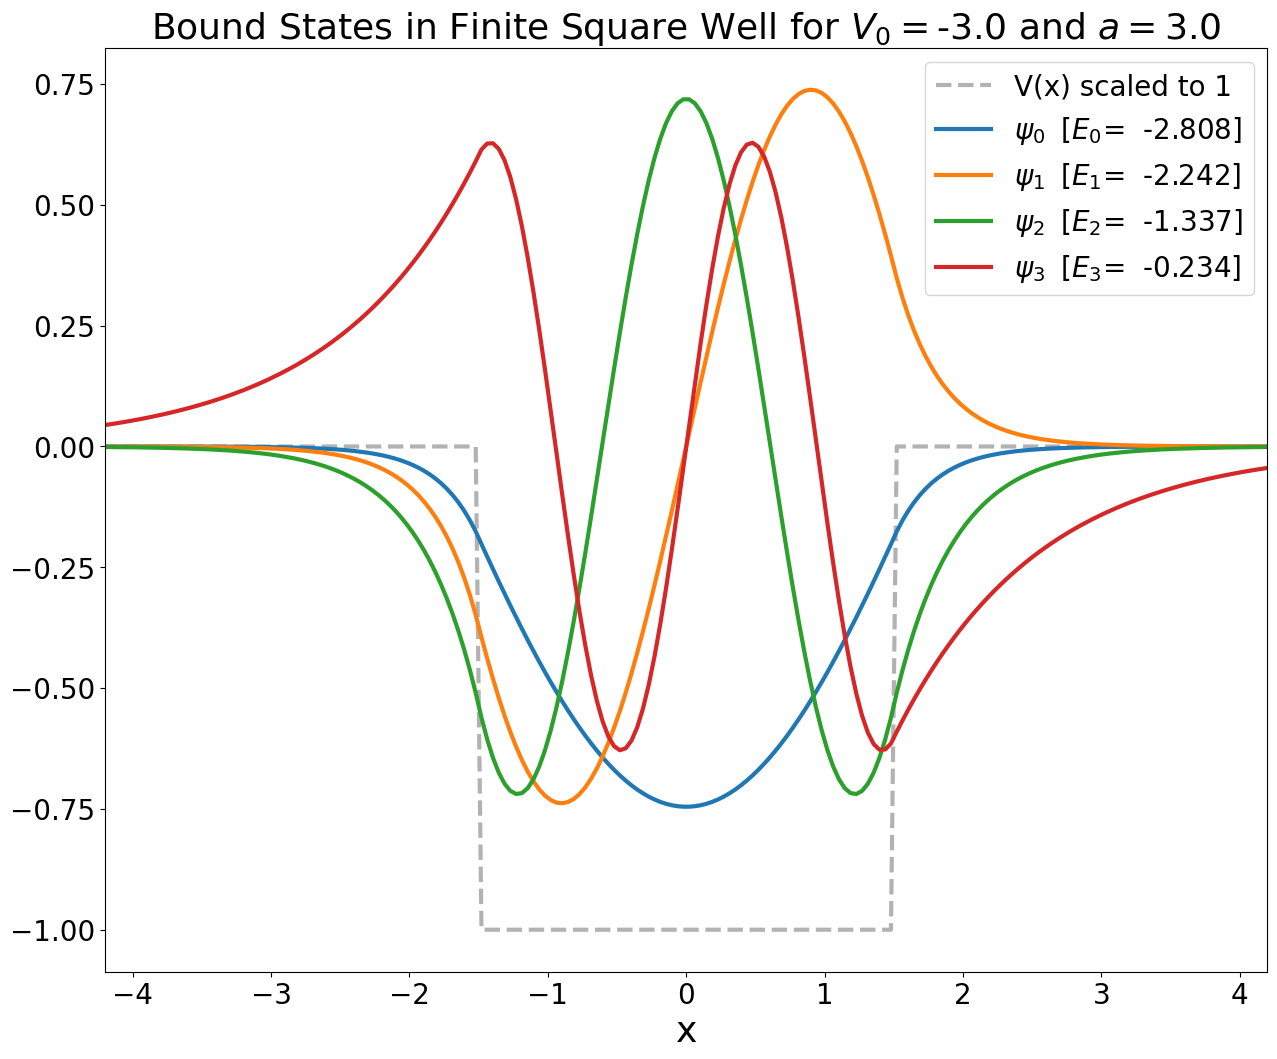

In [27]:
plot_bound_states(3., -3.)